# Importing Librairies

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder

from scipy.stats import stats
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
from sklearn.model_selection import RandomizedSearchCV

# Loading Dataset

In [2]:
# importing dataset
df = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Insurance%20Claim%20Fraud%20Detection/Automobile_insurance_fraud.csv")

# Descriptive analysis

In [3]:
# printing first 5 rows of the dataset
df.head()

328  48  521585  17-10-2014  OH   250/500  1000  1406.91        0  466132  \
0  228  42  342868  27-06-2006  IN   250/500  2000  1197.22  5000000  468176   
1  134  29  687698  06-09-2000  OH   100/300  2000  1413.14  5000000  430632   
2  256  41  227811  25-05-1990  IL   250/500  2000  1415.74  6000000  608117   
3  228  44  367455  06-06-2014  IL  500/1000  1000  1583.91  6000000  610706   
4  256  39  104594  12-10-2006  OH   250/500  1000  1351.10        0  478456   

   ...  2 YES.1  71610  6510 13020  52080       Saab    92x  2004  Y  
0  ...  0     ?   5070   780   780   3510   Mercedes   E400  2007  Y  
1  ...  3    NO  34650  7700  3850  23100      Dodge    RAM  2007  N  
2  ...  2    NO  63400  6340  6340  50720  Chevrolet  Tahoe  2014  Y  
3  ...  1    NO   6500  1300   650   4550     Accura    RSX  2009  N  
4  ...  2    NO  64100  6410  6410  51280       Saab     95  2003  Y  

[5 rows x 39 columns]

In [4]:
df.columns = ["months_as_customer", "age", "policy_number", "policy_bind_date", "policy_state", "policy_csl", 
                    "policy_deductable", "policy_annual_premium", "umbrella_limit", "insured_zip", "insured_sex", 
                    "insured_education_level", "insured_occupation", "insured_hobbies", "insured_relationship", "capital-gains",
                   "capital-loss", "incident_date", "incident_type", "collision_type", "incident_severity", "authorities_contacted",
                   "incident_state", "incident_city", "incident_location", "incident_hour_of_the_day", "number_of_vehicles_involved",
                   "property_damage", "bodily_injuries", "witnesses", "police_report_available", "total_claim_amount", "injury_claim",
                   "property_claim", "vehicle_claim", "auto_make", "auto_model", "auto_year", "fraud_reported"]
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 228   42         342868       27-06-2006           IN   
1                 134   29         687698       06-09-2000           OH   
2                 256   41         227811       25-05-1990           IL   
3                 228   44         367455       06-06-2014           IL   
4                 256   39         104594       12-10-2006           OH   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               2000                1197.22         5000000   
1    100/300               2000                1413.14         5000000   
2    250/500               2000                1415.74         6000000   
3   500/1000               1000                1583.91         6000000   
4    250/500               1000                1351.10               0   

   insured_zip  ... witnesses police_report_available total_claim_amount  \
0       468176  ...         0                       ?               5070   
1       430632  ...         3                      NO              34650   
2       608117  ...         2                      NO              63400   
3       610706  ...         1                      NO               6500   
4       478456  ...         2                      NO              64100   

  injury_claim property_claim  vehicle_claim  auto_make auto_model auto_year  \
0          780            780           3510   Mercedes       E400      2007   
1         7700           3850          23100      Dodge        RAM      2007   
2         6340           6340          50720  Chevrolet      Tahoe      2014   
3         1300            650           4550     Accura        RSX      2009   
4         6410           6410          51280       Saab         95      2003   

  fraud_reported  
0              Y  
1              N  
2              Y  
3              N  
4              Y  

[5 rows x 39 columns]

In [5]:
# checking dimensions of the dataset
df.shape

(999, 39)

In [6]:
# printing the columns of the dataset
df.columns.tolist()

['months_as_customer',
 'age',
 'policy_number',
 'policy_bind_date',
 'policy_state',
 'policy_csl',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'insured_zip',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'capital-gains',
 'capital-loss',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'property_damage',
 'bodily_injuries',
 'witnesses',
 'police_report_available',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_make',
 'auto_model',
 'auto_year',
 'fraud_reported']

In [7]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

There are 3 different types (int64, object & float64) of data present in this dataset.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           999 non-null    int64  
 1   age                          999 non-null    int64  
 2   policy_number                999 non-null    int64  
 3   policy_bind_date             999 non-null    object 
 4   policy_state                 999 non-null    object 
 5   policy_csl                   999 non-null    object 
 6   policy_deductable            999 non-null    int64  
 7   policy_annual_premium        999 non-null    float64
 8   umbrella_limit               999 non-null    int64  
 9   insured_zip                  999 non-null    int64  
 10  insured_sex                  999 non-null    object 
 11  insured_education_level      999 non-null    object 
 12  insured_occupation           999 non-null    object 
 13  insured_hobbies     

In [9]:
# checking if any whitespace, 'NA' or '-' exist in the dataset
df.isin([' ', 'NA', '-']).sum().any()

False

In [10]:
# checking if any '?' in the dataset
df.isin(['?']).sum().any()

True

Let replace '?' with np.NaN

In [11]:
df=df.replace('?',np.NaN)

### Missing value check

In [12]:
# checking for missing values
df.isnull().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted           91
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

'collision_type', 'authorities_contacted', 'property_damage','police_report_available' contain missing values.

### Missing value imputation

In [13]:
df['collision_type'].fillna(df['collision_type'].mode()[0],inplace=True)
df['authorities_contacted'].fillna(df['authorities_contacted'].mode()[0],inplace=True)
df['property_damage'].fillna(df['property_damage'].mode()[0],inplace=True)
df['police_report_available'].fillna(df['police_report_available'].mode()[0],inplace=True)

In [14]:
# Droping unnecessary columns
df.drop(['incident_location','insured_zip','policy_number'],axis=1,inplace=True)

### Missing value check after imputation

In [15]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_c

Finally, No Missing Value is Present.

#### We will split this column into two CSL columns for person and accident.

In [16]:
# Spliting and extracting policy_csl at '/'
df['CSL_Personal']=df.policy_csl.str.split('/',expand=True)[0]
df['CSL_Accidental']=df.policy_csl.str.split('/',expand=True)[1]

In [17]:
# Now we can drop policy_csl column 
df.drop("policy_csl",axis=1,inplace=True)

#### We have two feature here with datetime datatypes. We gone split them in terms of date,month and year.

In [18]:
# Converting Date columns from object type into datetime data type
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'])
df['incident_date']=pd.to_datetime(df['incident_date'])

In [19]:
# Extracting Day, Month and Year column from policy_bind_date
df['policy_bind_day'] = df['policy_bind_date'].dt.day
df['policy_bind_month'] = df['policy_bind_date'].dt.month
df['policy_bind_year'] = df['policy_bind_date'].dt.year

In [20]:
# Extracting Day, Month and Year column from incident_date
df['incident_day'] = df['incident_date'].dt.day
df['incident_month'] = df['incident_date'].dt.month
df['incident_year'] = df['incident_date'].dt.year

In [21]:
# Since Extraction is done now we can Drop policy_bind_date and incident_date columns
df.drop(['policy_bind_date','incident_date'],axis=1,inplace=True)

In [22]:
# Incident year for all data is 2015 so we gone drop it.
df.drop(['incident_year'],axis=1,inplace=True)

#### As incident year is 2015, we will use 2015 as base year for new column creation.

In [23]:
# Lets extract age of the vehicle from auto_year by subtracting it from the year 2018
df['Automobile_Age']=2015 - df['auto_year']
# Droping auto year column
df.drop("auto_year",axis=1,inplace=True)

#### Spliting feature in categorical and numerical variable

In [24]:
Category = ['policy_state',  'insured_sex', 'insured_education_level', 'insured_occupation', 
            'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity',
            'authorities_contacted','incident_state', 'incident_city', 'property_damage','police_report_available',
            'auto_make','auto_model', 'fraud_reported']
    
Numerical = ['months_as_customer','CSL_Personal','CSL_Accidental', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss', 
             'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 
             'total_claim_amount','injury_claim', 'property_claim', 'vehicle_claim', 'Automobile_Age','policy_annual_premium']

In [25]:
df.describe()

months_as_customer         age  policy_deductable  \
count          999.000000  999.000000         999.000000   
mean           203.829830   38.938939        1136.136136   
std            115.103809    9.140370         612.155989   
min              0.000000   19.000000         500.000000   
25%            115.500000   32.000000         500.000000   
50%            199.000000   38.000000        1000.000000   
75%            276.000000   44.000000        2000.000000   
max            479.000000   64.000000        2000.000000   

       policy_annual_premium  umbrella_limit  capital-gains   capital-loss  \
count             999.000000    9.990000e+02     999.000000     999.000000   
mean             1256.255495    1.102102e+06   25097.897898  -26820.520521   
std               244.243187    2.298293e+06   27871.869471   28105.366259   
min               433.330000   -1.000000e+06       0.000000 -111100.000000   
25%              1089.185000    0.000000e+00       0.000000  -51500.000000   
50%              1257.040000    0.000000e+00       0.000000  -24100.000000   
75%              1415.710000    0.000000e+00   51000.000000       0.000000   
max              2047.590000    1.000000e+07  100500.000000       0.000000   

       incident_hour_of_the_day  number_of_vehicles_involved  bodily_injuries  \
count                999.000000                   999.000000       999.000000   
mean                  11.650651                     1.839840         0.991992   
std                    6.951671                     1.019044         0.820538   
min                    0.000000                     1.000000         0.000000   
25%                    6.000000                     1.000000         0.000000   
50%                   12.000000                     1.000000         1.000000   
75%                   17.000000                     3.000000         2.000000   
max                   23.000000                     4.000000         2.000000   

       ...  total_claim_amount  injury_claim  property_claim  vehicle_claim  \
count  ...          999.000000    999.000000      999.000000     999.000000   
mean   ...        52743.073073   7434.344344     7393.943944   37914.784785   
std    ...        26408.011569   4883.309038     4823.859773   18890.397013   
min    ...          100.000000      0.000000        0.000000      70.000000   
25%    ...        41775.000000   4290.000000     4440.000000   30275.000000   
50%    ...        57970.000000   6780.000000     6750.000000   42080.000000   
75%    ...        70550.000000  11310.000000    10870.000000   50775.000000   
max    ...       114920.000000  21450.000000    23670.000000   79560.000000   

       policy_bind_day  policy_bind_month  policy_bind_year  incident_day  \
count       999.000000         999.000000        999.000000    999.000000   
mean         15.446446           6.555556       2001.591592     14.984985   
std           8.812275           3.499881          7.353606      8.669550   
min           1.000000           1.000000       1990.000000      1.000000   
25%           8.000000           3.000000       1995.000000      7.500000   
50%          16.000000           7.000000       2002.000000     15.000000   
75%          23.000000          10.000000       2008.000000     22.000000   
max          31.000000          12.000000       2015.000000     31.000000   

       incident_month  Automobile_Age  
count      999.000000      999.000000  
mean         1.496496        9.895896  
std          0.523724        6.018773  
min          1.000000        0.000000  
25%          1.000000        5.000000  
50%          1.000000       10.000000  
75%          2.000000       15.000000  
max          3.000000       20.000000  

[8 rows x 21 columns]

## Exploring Target variable

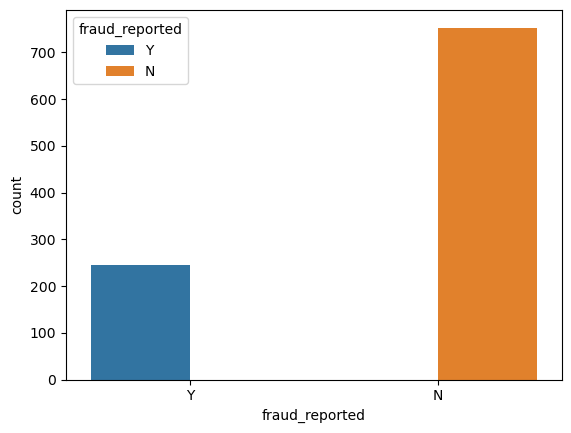

In [26]:
figsize=(8,5)
a = sns.countplot(x='fraud_reported', data=df, hue='fraud_reported')

In [27]:
# Count number of frauds vs non-frauds
df['fraud_reported'].value_counts()

fraud_reported
N    753
Y    246
Name: count, dtype: int64

'fraud_reported' is our target variable to be predicted. From count plot we can say dataset is imbalanced in nature.

## Exploring target variable against Independent features to gain more insight.

### Analysing Age vs Fraud

In [28]:
print('Minimum Age :',df.age.min(),'Years')
print('Maximum Age :',df.age.max(),'Years')
print('Average Age :',df.age.mean(),'Years')

Minimum Age : 19 Years
Maximum Age : 64 Years
Average Age : 38.93893893893894 Years


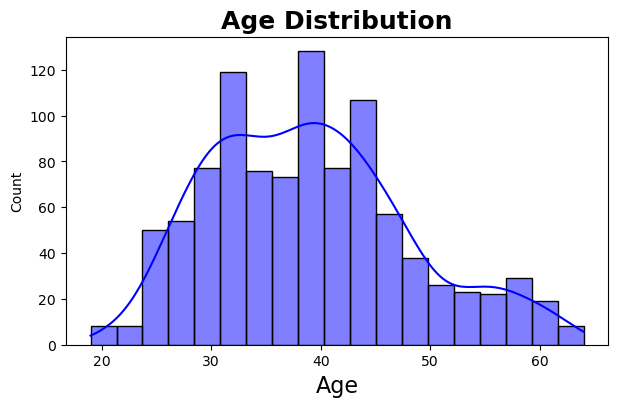

In [29]:
plt.figure(figsize=(7,4))
sns.histplot(df.age, kde=True, color='b')
plt.xlabel('Age',fontsize=16)
plt.title('Age Distribution', fontsize=18,fontweight ='bold')
plt.show()

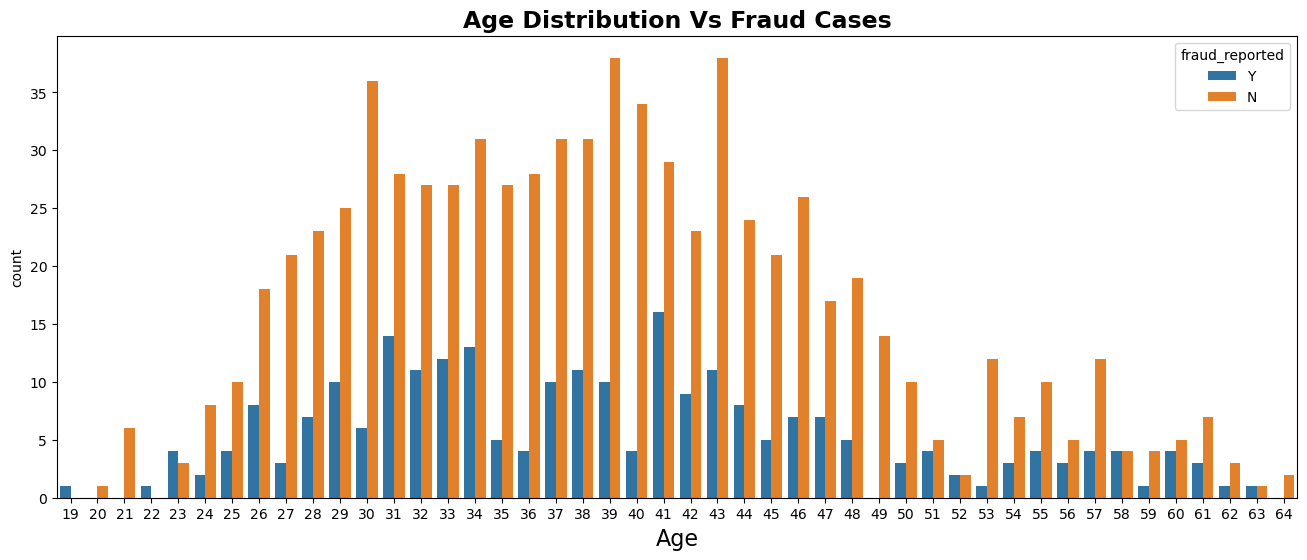

In [30]:
plt.figure(figsize=(16,6))
sns.countplot(x=df.age, hue=df.fraud_reported)
plt.xlabel('Age',fontsize=16)
plt.title('Age Distribution Vs Fraud Cases', fontsize=17,fontweight ='bold')
plt.show()

Maximum fraud cases comes from people with age group of 31-50 year.

### Policy State Vs Fraud cases

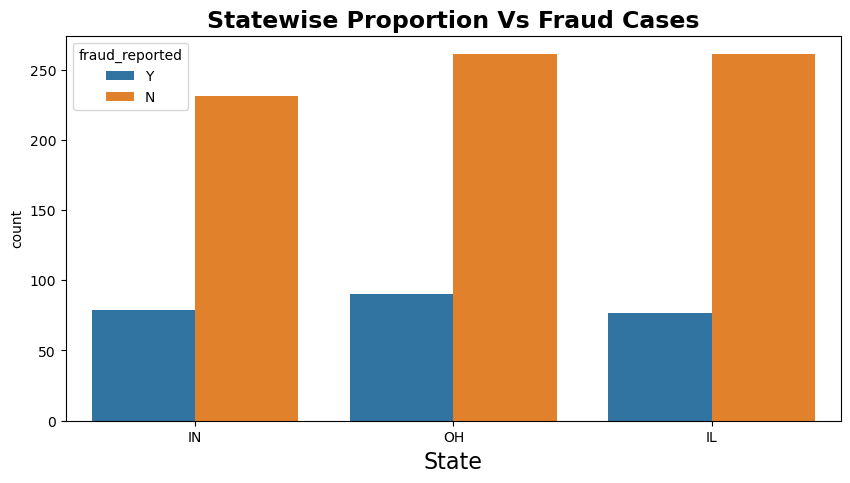

In [31]:
plt.figure(figsize=(10,5))
sns.countplot(x=df.policy_state, hue=df.fraud_reported)
plt.xlabel('State',fontsize=16)
plt.title('Statewise Proportion Vs Fraud Cases', fontsize=17,fontweight ='bold')
plt.show()

Almost same amout of cases come from each state.

Maximum fraud cases come from state of Ohio.

### Insured Gender VS Fraud cases

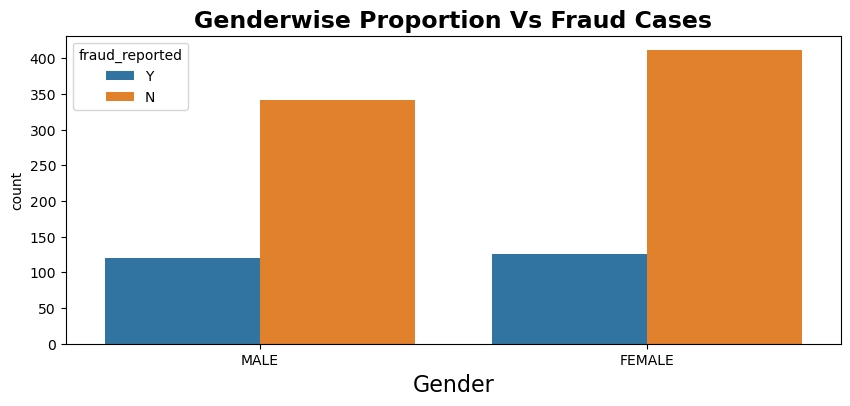

In [33]:
plt.figure(figsize=(10,4))
sns.countplot(x=df.insured_sex, hue=df.fraud_reported)
plt.xlabel('Gender',fontsize=16)
plt.title('Genderwise Proportion Vs Fraud Cases', fontsize=17,fontweight ='bold')
plt.show()

Number of claims come from female is higher than which reported by male insured.

Almost same amount of fraud cases comes from same gender.

### Education_level vs Fraud cases

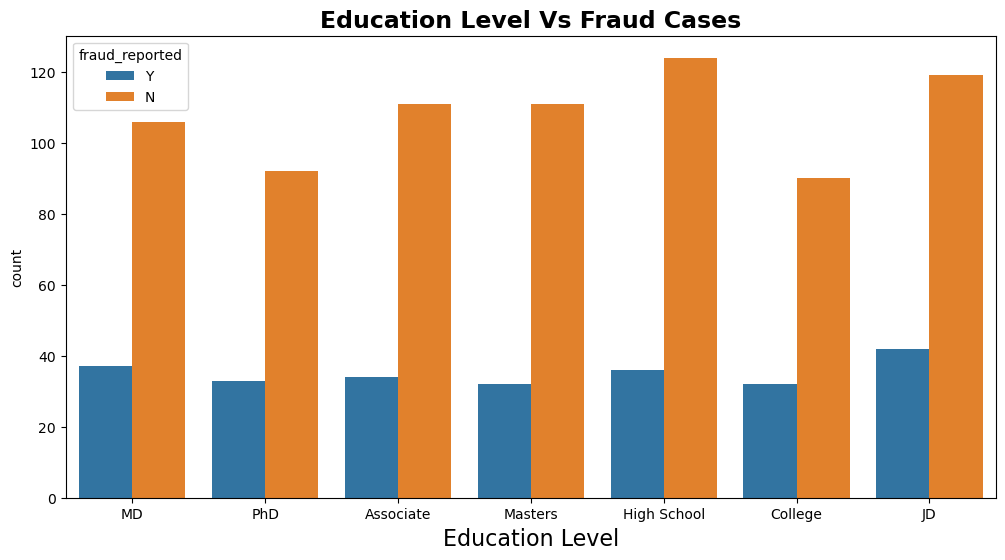

In [34]:
plt.figure(figsize=(12,6))
sns.countplot(x=df.insured_education_level, hue=df.fraud_reported)
plt.xlabel('Education Level',fontsize=16)
plt.title('Education Level Vs Fraud Cases', fontsize=17,fontweight ='bold')
plt.show()

We can see tendency to make fraud claims has across every education backgroud, even in Masters,PhD. Education Level is not much important variable for us. 

### Occupation of Insured Customers

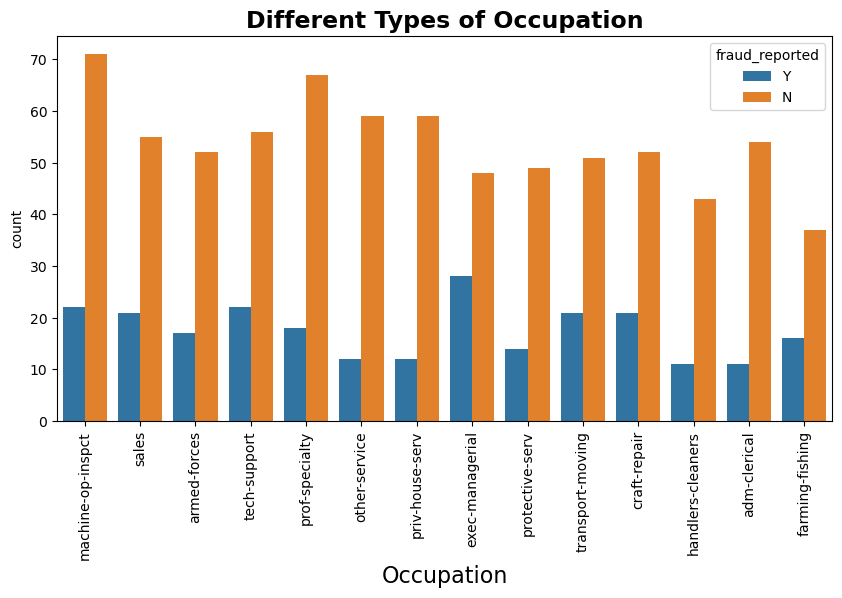

In [35]:
plt.figure(figsize=(10,5))
sns.countplot(x=df.insured_occupation, hue=df.fraud_reported)
plt.xlabel('Occupation',fontsize=16)
plt.title('Different Types of Occupation', fontsize=17,fontweight ='bold')
plt.xticks(rotation = 90)
plt.show()

### Hobbies of Insured Customers

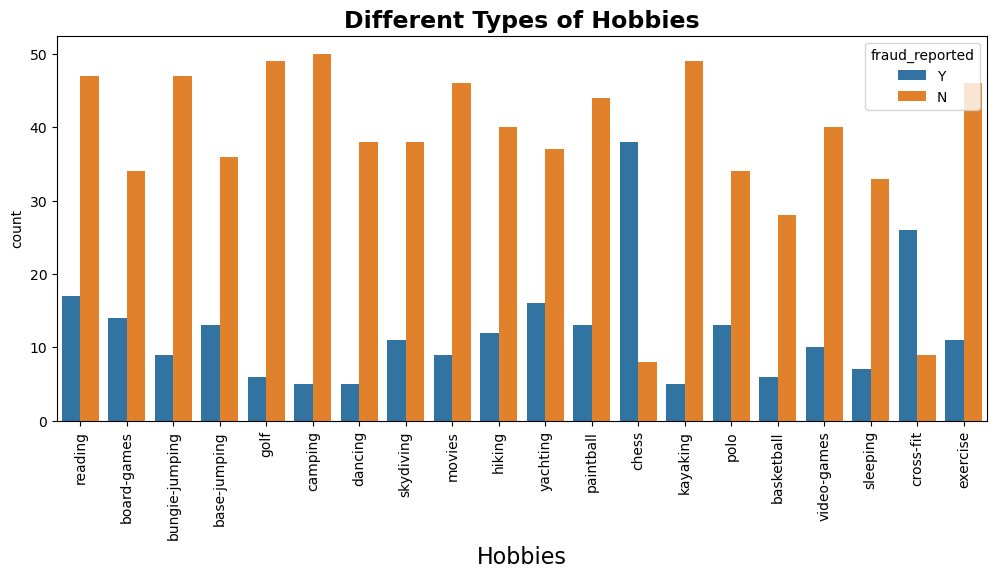

In [36]:
plt.figure(figsize=(12,5))
sns.countplot(x=df.insured_hobbies, hue=df.fraud_reported)
plt.xlabel('Hobbies',fontsize=16)
plt.title('Different Types of Hobbies', fontsize=17,fontweight ='bold')
plt.xticks(rotation = 90)
plt.show()

### Different Types of Incidents Vs Fraud cases

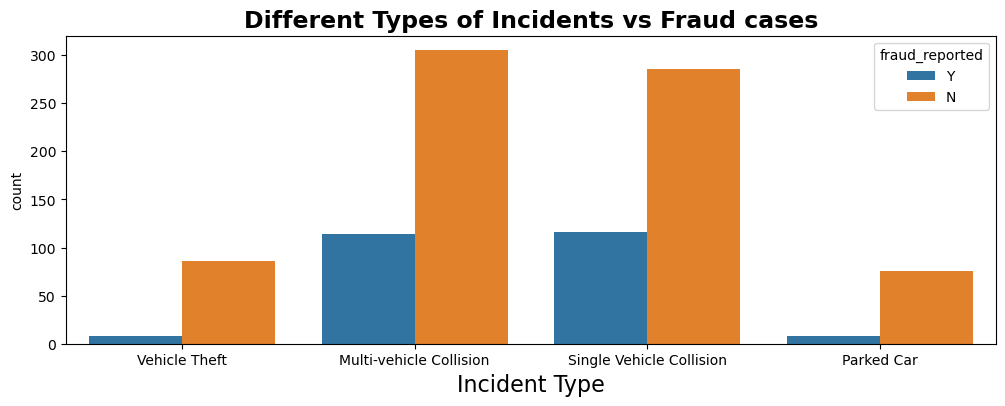

In [37]:
plt.figure(figsize=(12,4))
sns.countplot(x=df.incident_type, hue=df.fraud_reported)
plt.xlabel('Incident Type',fontsize=16)
plt.title('Different Types of Incidents vs Fraud cases', fontsize=17,fontweight ='bold')
plt.show()

Most of case comes from Multi-vehicle and single vehicle collision.

Some claims are due to automobile robbery.

## Exploration of different Collision

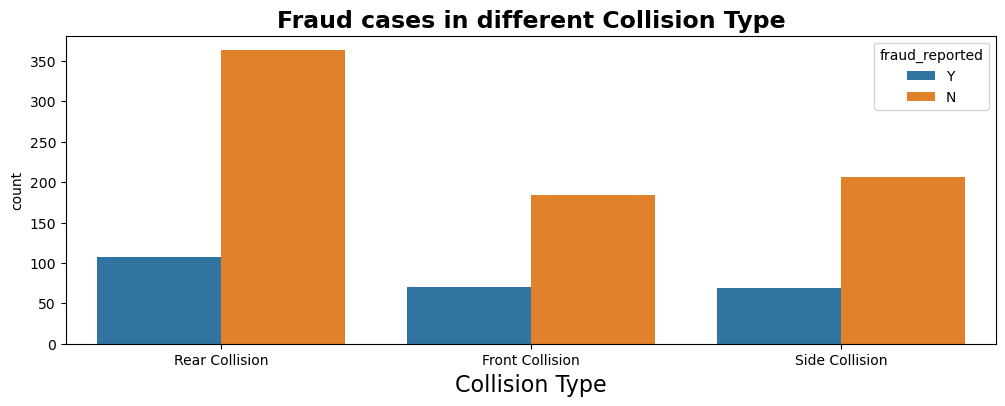

In [38]:
plt.figure(figsize=(12,4))
sns.countplot(x=df.collision_type, hue=df.fraud_reported)
plt.xlabel('Collision Type',fontsize=16)
plt.title('Fraud cases in different Collision Type', fontsize=17,fontweight ='bold')
plt.show()

### Incident Type vs Collision Type

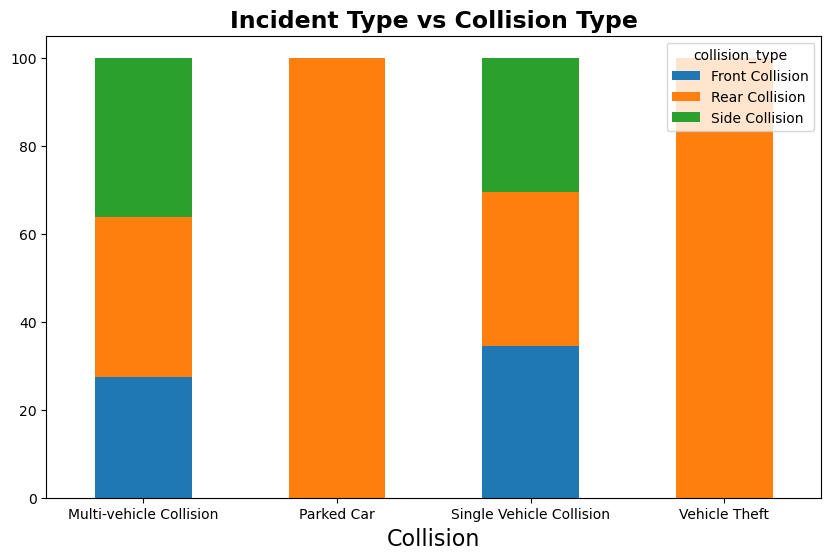

In [41]:
plt.rcParams['figure.figsize'] = (10,6)
table = pd.crosstab(df['incident_type'], df['collision_type'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True)
plt.xlabel('Collision',fontsize=16)
plt.title('Incident Type vs Collision Type', fontsize=17,fontweight ='bold')
plt.xticks(rotation = 0)
plt.show()

### Collision VS Incident Severity

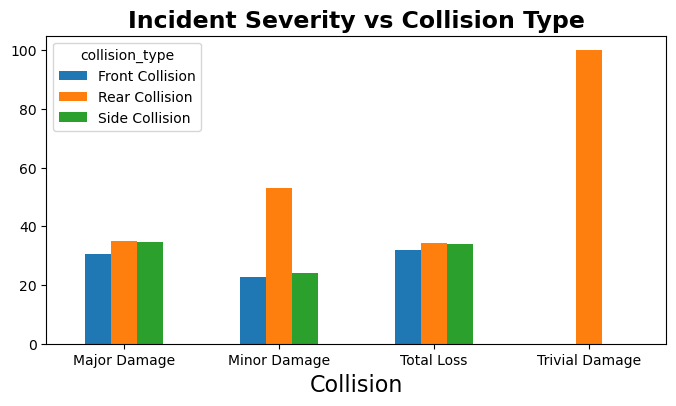

In [42]:
plt.rcParams['figure.figsize'] = (8,4)
table = pd.crosstab(df['incident_severity'], df['collision_type'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar')
plt.xlabel('Collision',fontsize=16)
plt.title('Incident Severity vs Collision Type', fontsize=17,fontweight ='bold')
plt.xticks(rotation = 0)
plt.show()

In [43]:
#checking another plot of Incident Type VS Severity of collision to gain more insight
pd.crosstab(df['incident_type'], df['incident_severity']).style.background_gradient(cmap='summer_r')

### Incident Type vs Incident Severity

<Figure size 1800x400 with 0 Axes>

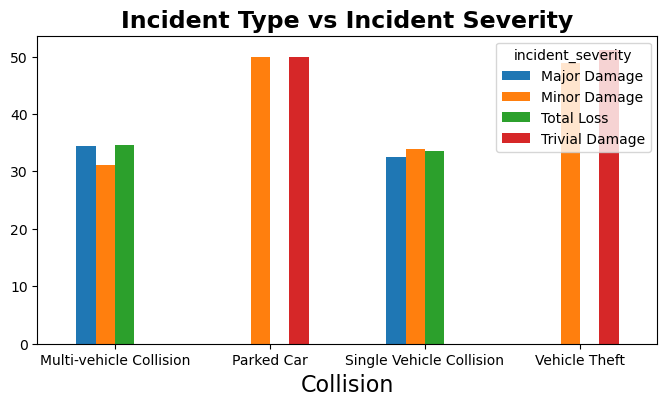

In [44]:
plt.figure(figsize=(18,4))
table = pd.crosstab(df['incident_type'], df['incident_severity'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar')
plt.xlabel('Collision',fontsize=16)
plt.title('Incident Type vs Incident Severity', fontsize=17,fontweight ='bold')
plt.xticks(rotation = 0)
plt.show()

It seem like incident Type is important variable for us. Now is time to dive deep to get more insight on incident type by visualise incident type with Numerical features.

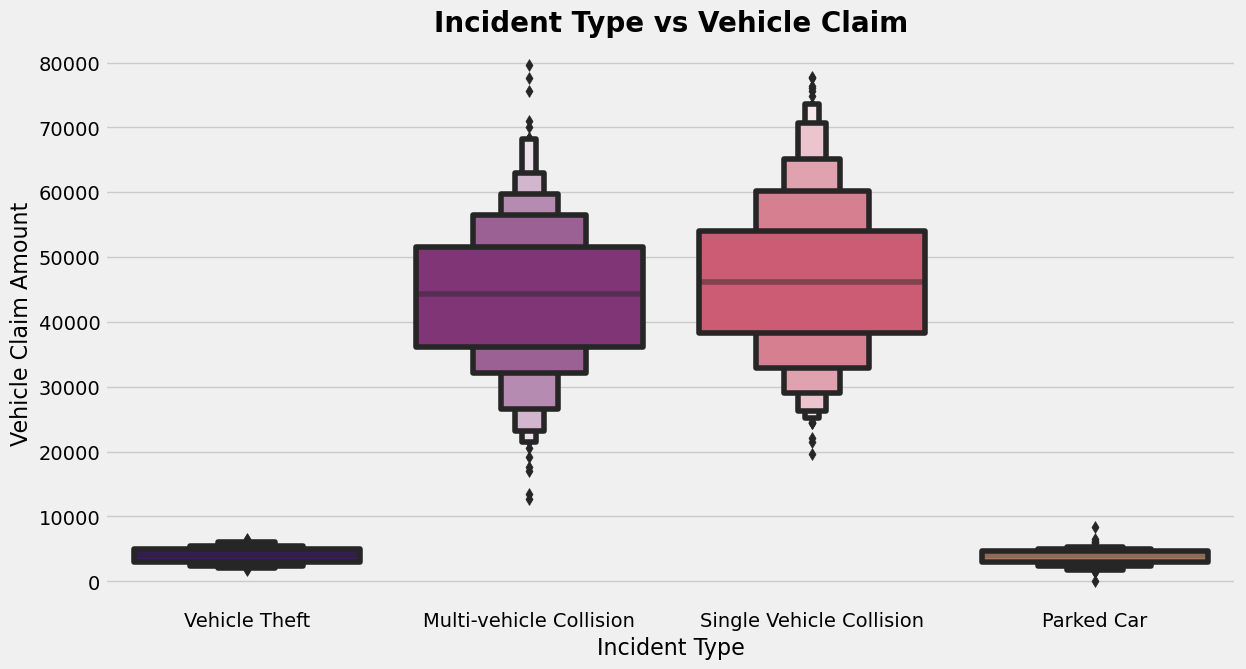

In [45]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (13,7)
sns.boxenplot(x=df['incident_type'], y=df['vehicle_claim'], palette = 'magma')
plt.title('Incident Type vs Vehicle Claim',fontsize=20,fontweight ='bold')
plt.xlabel('Incident Type', fontsize=16)
plt.ylabel('Vehicle Claim Amount', fontsize=16)
plt.show()

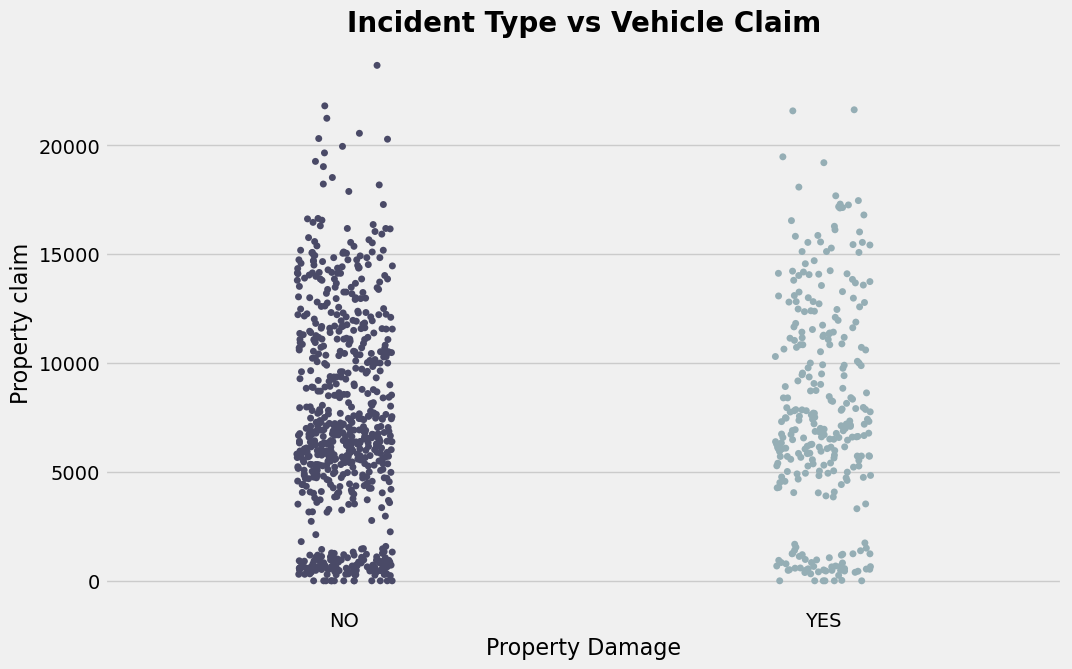

In [46]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (11,7)
sns.stripplot(x=df['property_damage'], y=df['property_claim'], palette = 'bone')
plt.title('Incident Type vs Vehicle Claim',fontsize=20,fontweight ='bold')
plt.xlabel('Property Damage', fontsize=16)
plt.ylabel('Property claim', fontsize=16)
plt.show()

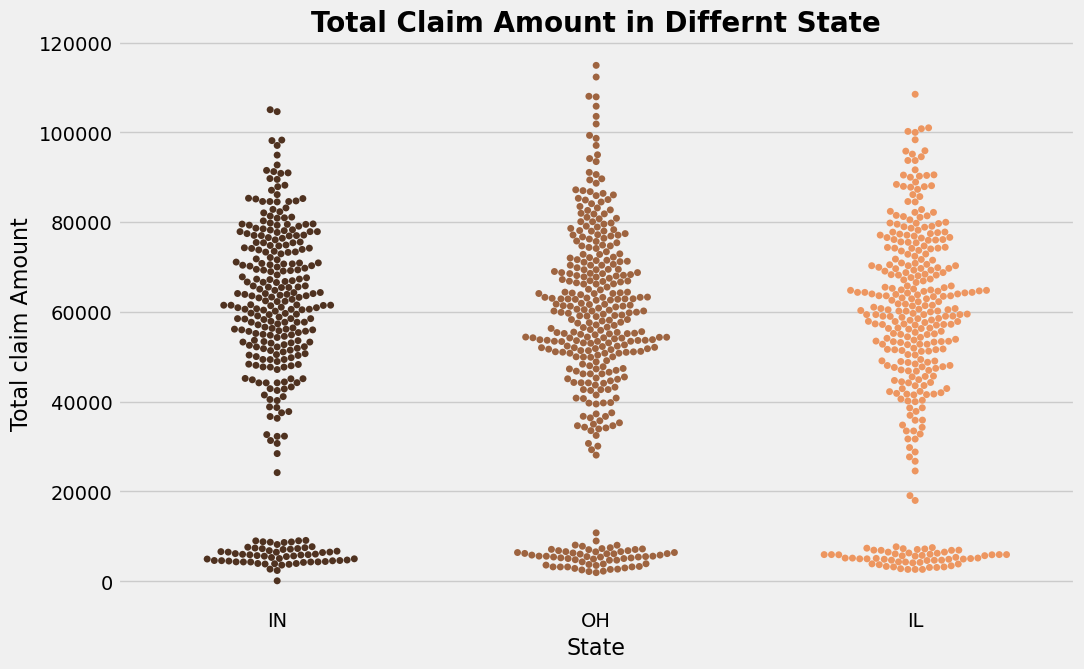

In [47]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (11,7)
sns.swarmplot(x=df['policy_state'], y=df['total_claim_amount'], palette = 'copper')
plt.title('Total Claim Amount in Differnt State',fontsize=20,fontweight ='bold')
plt.xlabel('State', fontsize=16)
plt.ylabel('Total claim Amount', fontsize=16)
plt.show()

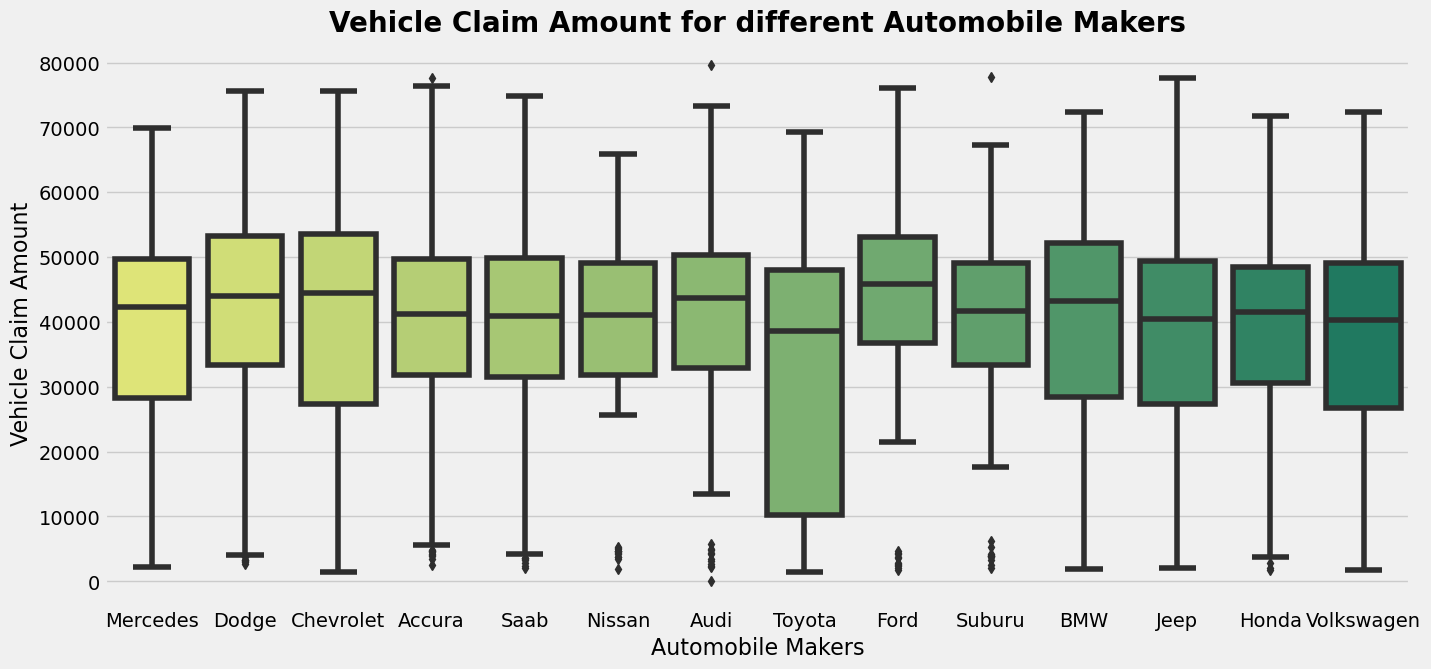

In [48]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,7)
sns.boxplot(x=df['auto_make'], y=df['vehicle_claim'], palette = 'summer_r')
plt.title('Vehicle Claim Amount for different Automobile Makers',fontsize=20,fontweight ='bold')
plt.xlabel('Automobile Makers', fontsize=16)
plt.ylabel('Vehicle Claim Amount', fontsize=16)
plt.show()

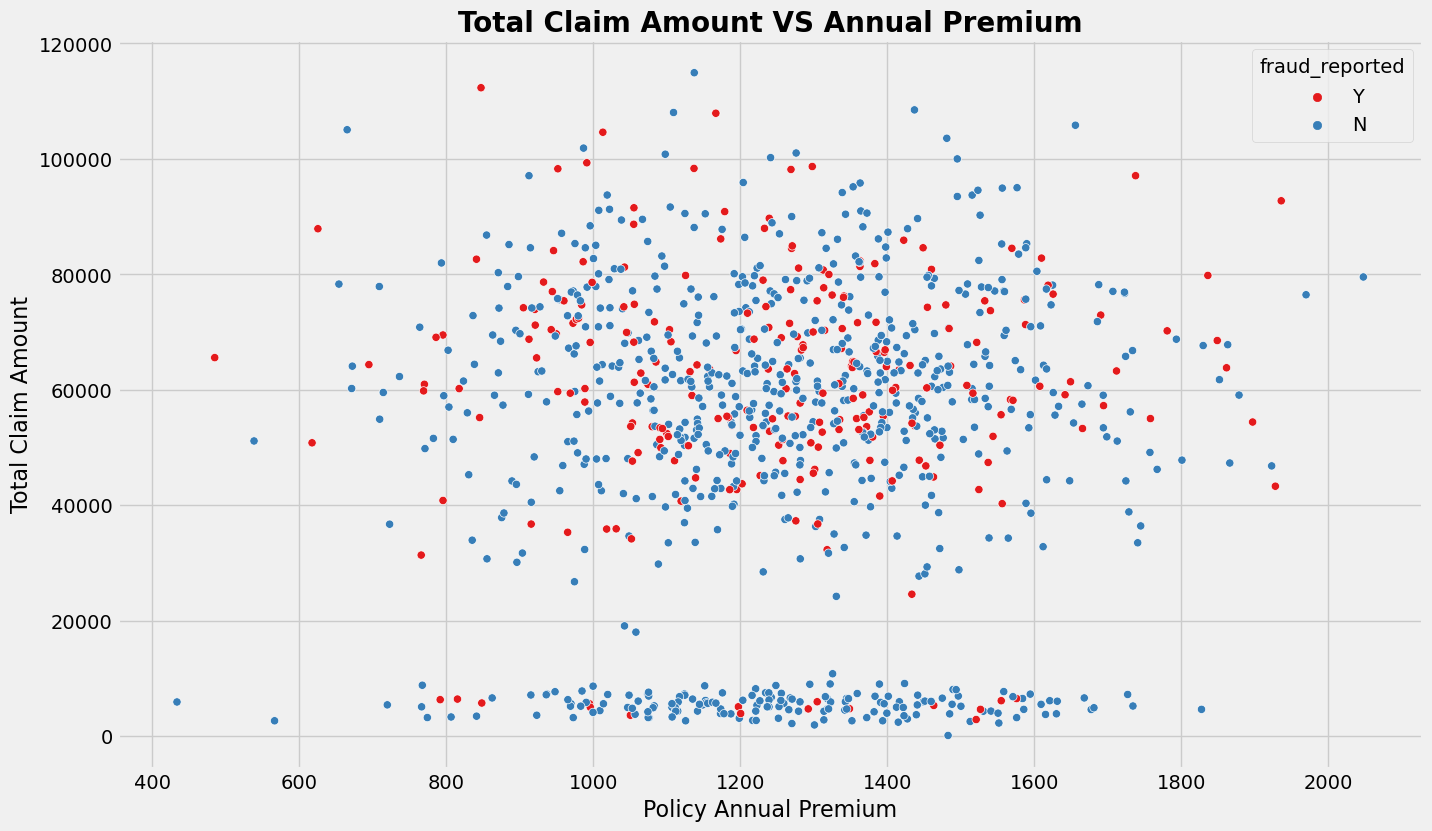

In [49]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,9)
sns.scatterplot(x=df['policy_annual_premium'], y=df['total_claim_amount'], hue=df.fraud_reported, palette = 'Set1')
plt.title('Total Claim Amount VS Annual Premium',fontsize=20,fontweight ='bold')
plt.xlabel('Policy Annual Premium', fontsize=16)
plt.ylabel('Total Claim Amount', fontsize=16)
plt.show()

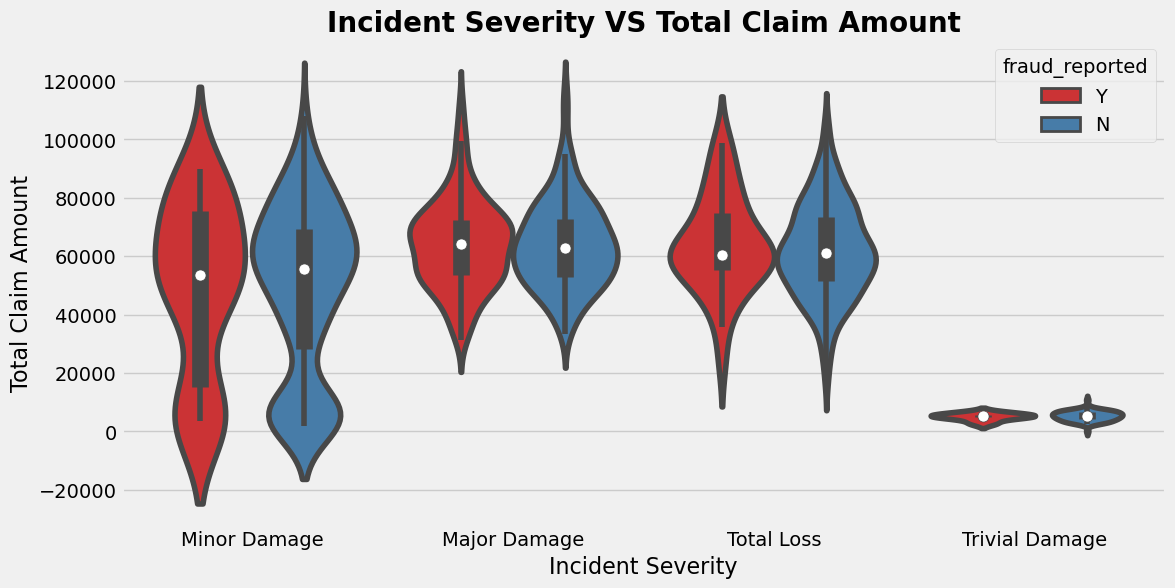

In [50]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,6)
sns.violinplot(x=df['incident_severity'], y=df['total_claim_amount'], hue=df.fraud_reported, palette = 'Set1')
plt.title('Incident Severity VS Total Claim Amount',fontsize=20,fontweight ='bold')
plt.xlabel('Incident Severity', fontsize=16)
plt.ylabel('Total Claim Amount', fontsize=16)
plt.show()

In [51]:
# to see truncated columns
pd.set_option('display.max_columns', None)
df.head()

months_as_customer  age policy_state  policy_deductable  \
0                 228   42           IN               2000   
1                 134   29           OH               2000   
2                 256   41           IL               2000   
3                 228   44           IL               1000   
4                 256   39           OH               1000   

   policy_annual_premium  umbrella_limit insured_sex insured_education_level  \
0                1197.22         5000000        MALE                      MD   
1                1413.14         5000000      FEMALE                     PhD   
2                1415.74         6000000      FEMALE                     PhD   
3                1583.91         6000000        MALE               Associate   
4                1351.10               0      FEMALE                     PhD   

  insured_occupation insured_hobbies insured_relationship  capital-gains  \
0  machine-op-inspct         reading       other-relative              0   
1              sales     board-games            own-child          35100   
2       armed-forces     board-games            unmarried          48900   
3              sales     board-games            unmarried          66000   
4       tech-support  bungie-jumping            unmarried              0   

   capital-loss             incident_type   collision_type incident_severity  \
0             0             Vehicle Theft   Rear Collision      Minor Damage   
1             0   Multi-vehicle Collision   Rear Collision      Minor Damage   
2        -62400  Single Vehicle Collision  Front Collision      Major Damage   
3        -46000             Vehicle Theft   Rear Collision      Minor Damage   
4             0   Multi-vehicle Collision   Rear Collision      Major Damage   

  authorities_contacted incident_state incident_city  \
0                Police             VA     Riverwood   
1                Police             NY      Columbus   
2                Police             OH     Arlington   
3                Police             NY     Arlington   
4                  Fire             SC     Arlington   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         8                            1              NO   
1                         7                            3              NO   
2                         5                            1              NO   
3                        20                            1              NO   
4                        19                            3              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                0          0                      NO                5070   
1                2          3                      NO               34650   
2                1          2                      NO               63400   
3                0          1                      NO                6500   
4                0          2                      NO               64100   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0           780             780           3510   Mercedes       E400   
1          7700            3850          23100      Dodge        RAM   
2          6340            6340          50720  Chevrolet      Tahoe   
3          1300             650           4550     Accura        RSX   
4          6410            6410          51280       Saab         95   

  fraud_reported CSL_Personal CSL_Accidental  policy_bind_day  \
0              Y          250            500               27   
1              N          100            300                6   
2              Y          250            500               25   
3              N          500           1000                6   
4              Y          250            500               12   

   policy_bind_month  policy_bind_year  incident_day  incident_month  \
0                  6              2006            21      

# Encoding categorical data

In [52]:
Category = ['policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation',
            'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity',
            'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 
            'auto_make', 'auto_model', 'fraud_reported', 'CSL_Personal', 'CSL_Accidental']

In [53]:
# Using Label Encoder on categorical variable
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

months_as_customer  age  policy_state  policy_deductable  \
0                 228   42             1               2000   
1                 134   29             2               2000   
2                 256   41             0               2000   
3                 228   44             0               1000   
4                 256   39             2               1000   

   policy_annual_premium  umbrella_limit  insured_sex  \
0                1197.22         5000000            1   
1                1413.14         5000000            0   
2                1415.74         6000000            0   
3                1583.91         6000000            1   
4                1351.10               0            0   

   insured_education_level  insured_occupation  insured_hobbies  \
0                        4                   6               15   
1                        6                  11                2   
2                        6                   1                2   
3                        0                  11                2   
4                        6                  12                3   

   insured_relationship  capital-gains  capital-loss  incident_type  \
0                     2              0             0              3   
1                     3          35100             0              0   
2                     4          48900        -62400              2   
3                     4          66000        -46000              3   
4                     4              0             0              0   

   collision_type  incident_severity  authorities_contacted  incident_state  \
0               1                  1                      3               5   
1               1                  1                      3               1   
2               0                  0                      3               2   
3               1                  1                      3               1   
4               1                  0                      1               4   

   incident_city  incident_hour_of_the_day  number_of_vehicles_involved  \
0              5                         8                            1   
1              1                         7                            3   
2              0                         5                            1   
3              0                        20                            1   
4              0                        19                            3   

   property_damage  bodily_injuries  witnesses  police_report_available  \
0                0                0          0                        0   
1                0                2          3                        0   
2                0                1          2                        0   
3                0                0          1                        0   
4                0                0          2                        0   

   total_claim_amount  injury_claim  property_claim  vehicle_claim  auto_make  \
0                5070           780             780           3510          8   
1               34650          7700            3850          23100          4   
2               63400          6340            6340          50720          3   
3                6500          1300             650           4550          0   
4               64100          6410            6410          51280         10   

   auto_model  fraud_reported  CSL_Personal  CSL_Accidental  policy_bind_day  \
0          12               1             1               2               27   
1          30               0             0               1                6   
2          34               1             1               2               25   
3          31               0             2               0                6   
4           3               1             1               2               12   

   policy_bind_month  policy_bind_year  incident_day  incident_month  \
0                  6              

# Feature selection and Engineering

## Outliers Detection and Removal

In [54]:
Numerical = ['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss',
             'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 
             'total_claim_amount','injury_claim', 'property_claim', 'vehicle_claim', 'policy_bind_day', 
             'policy_bind_month', 'policy_bind_year', 'incident_day', 'incident_month', 'Automobile_Age','policy_annual_premium']

In [55]:
len(Numerical)

21

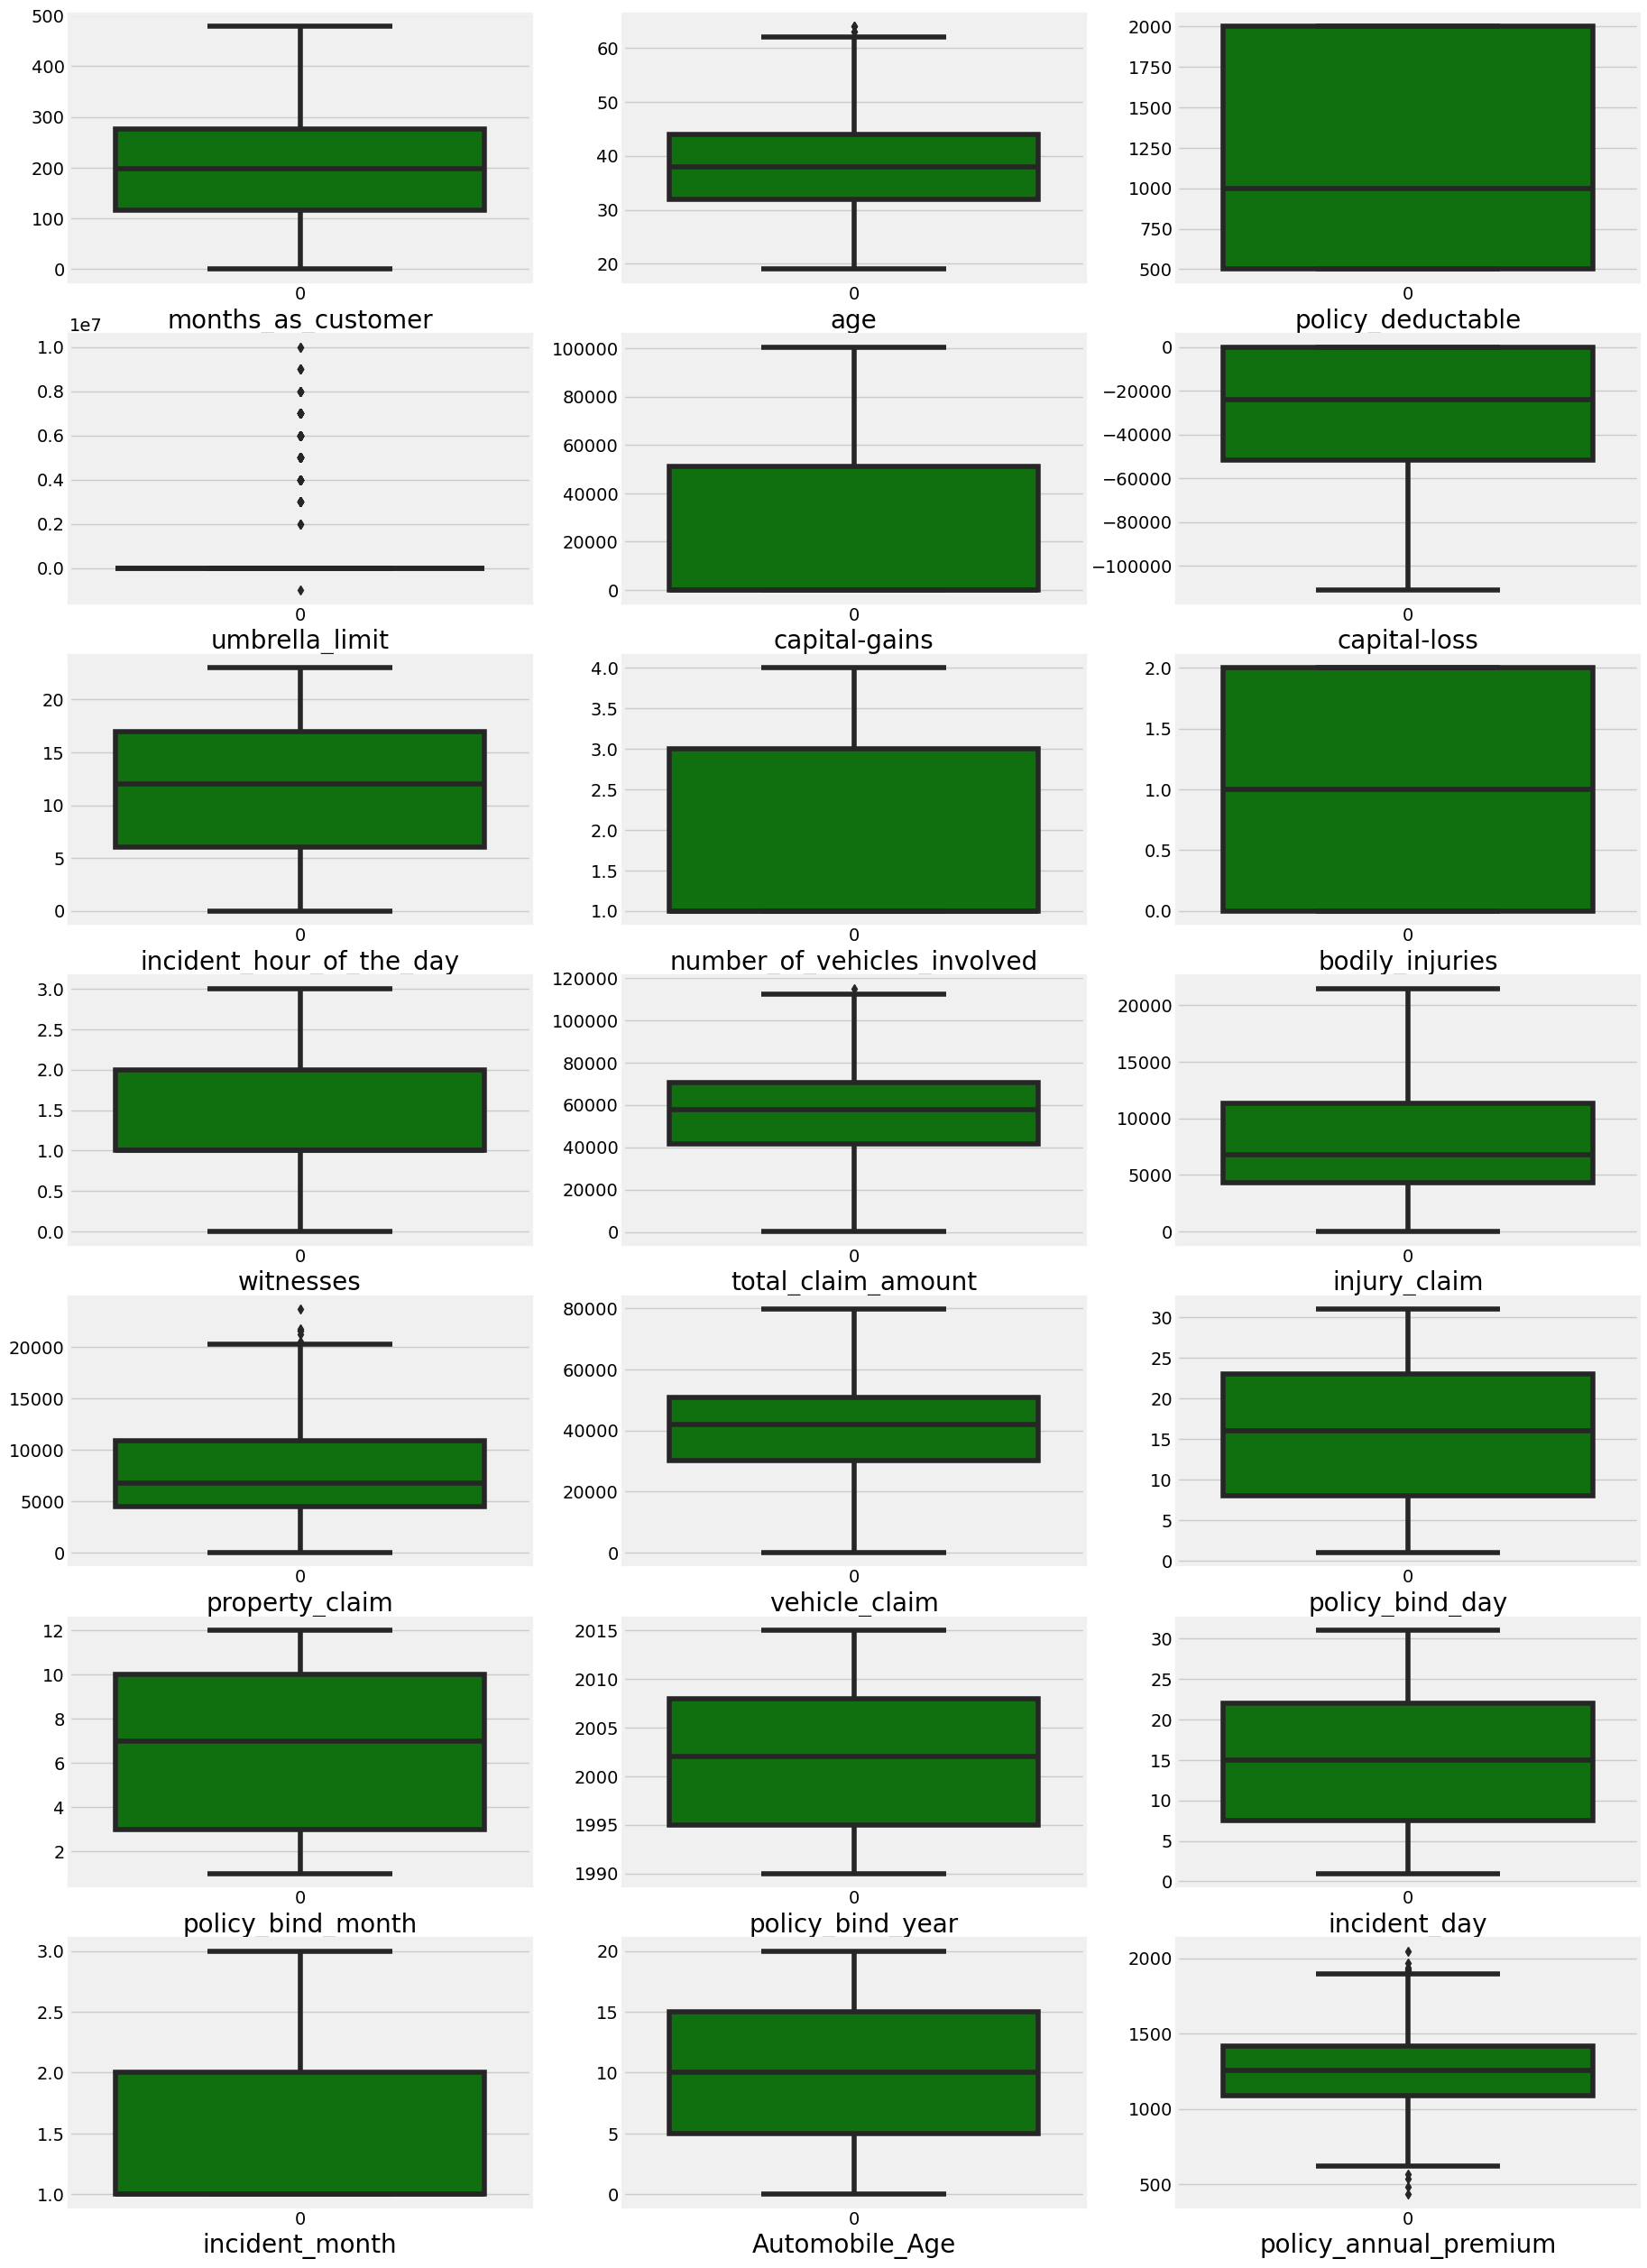

In [56]:
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in Numerical:
    if plotnumber<=21:
        ax=plt.subplot(7,3,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

From Boxplot we can see outliers exist dataset.

#### Outliers removal using Zscore method

In [57]:
z = stats.zscore(df)
threshold = 3
df1 = df[(z<3).all(axis =1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy()

Shape of the dataframe before removing outliers:  (999, 40)
Shape of the dataframe after removing outliers:  (982, 40)
Percentage of data loss post outlier removal:  1.7017017017017018


### Skewness of features

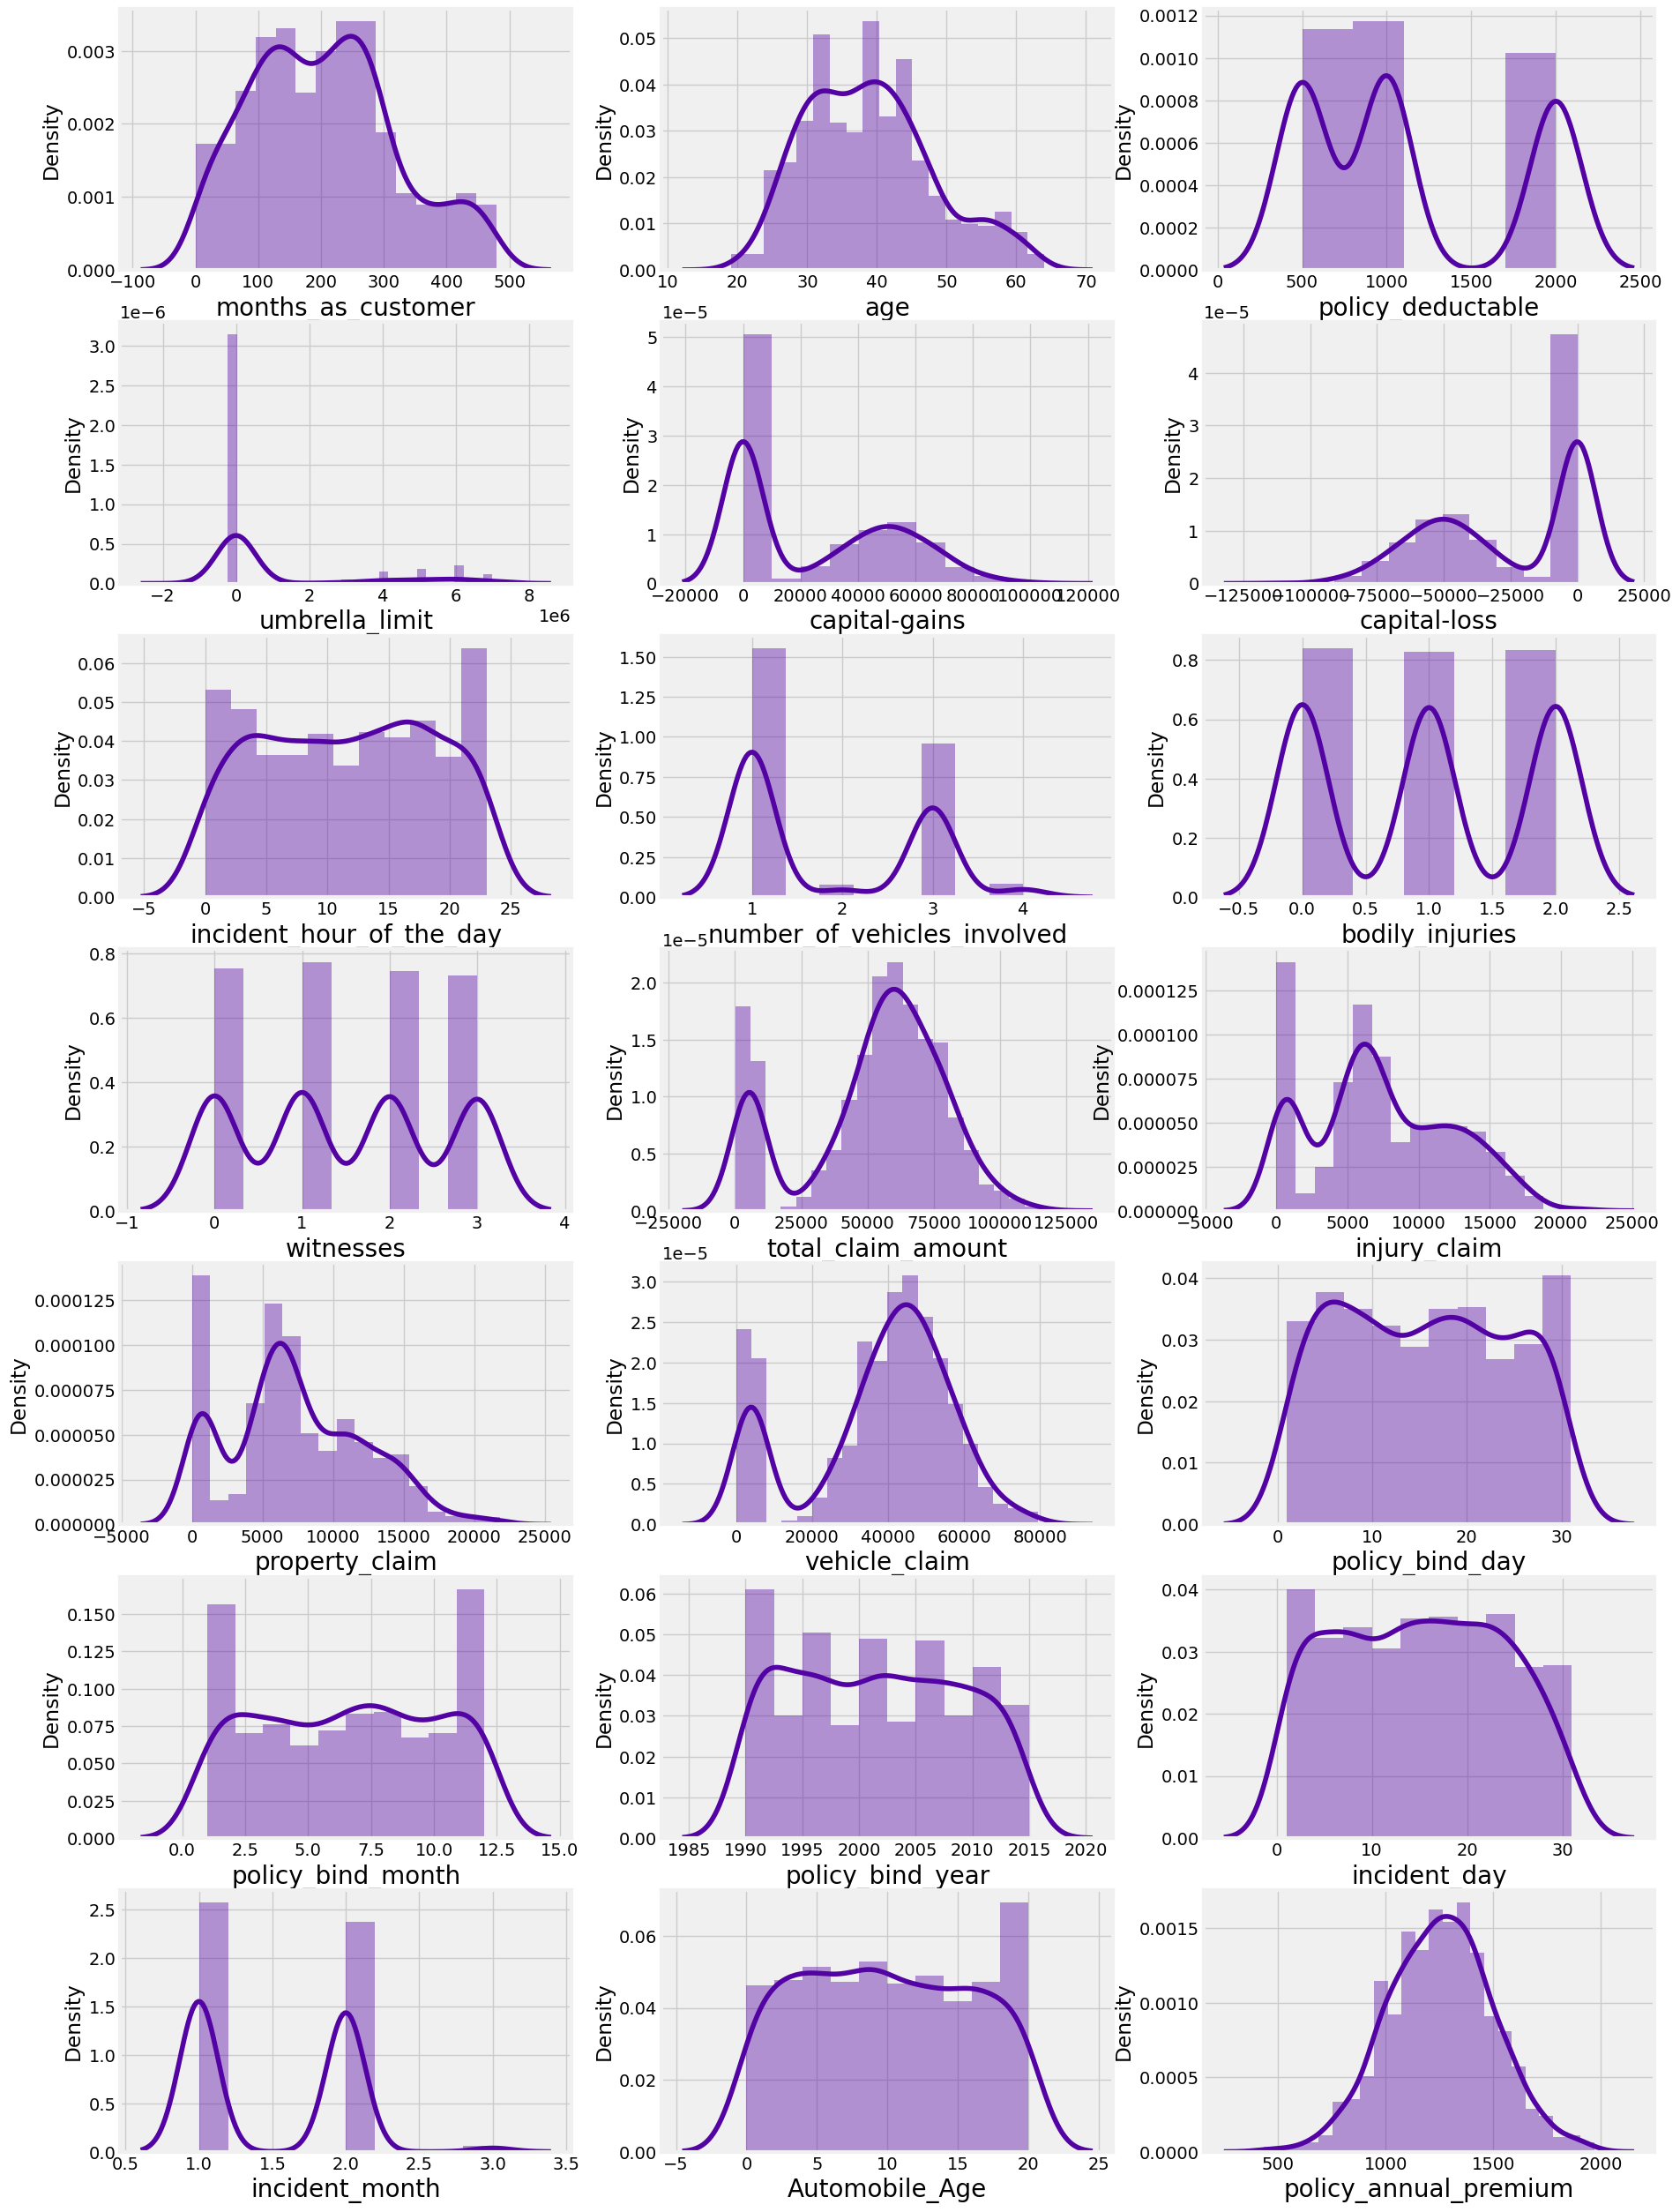

In [58]:
plt.figure(figsize=(20,30),facecolor='white')
sns.set_palette('plasma')
plotnum=1
for col in Numerical:
    if plotnum<=21:
        plt.subplot(7,3,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

Skewness is important feature for continous data. There is no relevence of skweness for discrete numerical feature like month and categorical feature.So we are going to ignore skewness present in discrete numerical and categorical feature.

We also going to ignore sknewness in target feature.

In [59]:
df[Numerical].skew()

months_as_customer             0.368785
age                            0.480768
policy_deductable              0.474918
umbrella_limit                 1.804706
capital-gains                  0.469361
capital-loss                  -0.387899
incident_hour_of_the_day      -0.036852
number_of_vehicles_involved    0.504261
bodily_injuries                0.005631
witnesses                      0.022923
total_claim_amount            -0.592769
injury_claim                   0.267762
property_claim                 0.359603
vehicle_claim                 -0.619425
policy_bind_day                0.052693
policy_bind_month             -0.025105
policy_bind_year               0.061080
incident_day                   0.039827
incident_month                 0.259447
Automobile_Age                 0.056589
policy_annual_premium         -0.016334
dtype: float64

In [60]:
# Making the skew less than or equal to +0.5 and -0.5 for better prediction using yeo-johnson method
skew=['total_claim_amount','vehicle_claim']

In [61]:
scaler = PowerTransformer(method='yeo-johnson')

In [62]:
# Transfroming skew data
df[skew] = scaler.fit_transform(df[skew].values)

#### Checking Skewness after transformation

In [63]:
df[skew].skew()

total_claim_amount   -0.509453
vehicle_claim        -0.522219
dtype: float64

For 'total_claim_amount','vehicle_claim' skewness has not been removed but it got reduced

## Corrleation

In [64]:
df.corr()

months_as_customer       age  policy_state  \
months_as_customer                     1.000000  0.922963     -0.007314   
age                                    0.922963  1.000000     -0.019523   
policy_state                          -0.007314 -0.019523      1.000000   
policy_deductable                      0.032470  0.033368      0.018126   
policy_annual_premium                  0.002446  0.012233      0.018472   
umbrella_limit                         0.019784  0.014846     -0.009747   
insured_sex                            0.058697  0.072186     -0.020575   
insured_education_level               -0.001044  0.000717     -0.029073   
insured_occupation                     0.010208  0.017697     -0.023716   
insured_hobbies                       -0.091253 -0.080702     -0.040897   
insured_relationship                   0.071178  0.076168     -0.015061   
capital-gains                          0.006198 -0.005615      0.067233   
capital-loss                           0.022965  0.012084     -0.033993   
incident_type                         -0.015897 -0.025591      0.031678   
collision_type                        -0.072708 -0.076170      0.048401   
incident_severity                     -0.060926 -0.061540     -0.026553   
authorities_contacted                  0.007024  0.008296     -0.007158   
incident_state                         0.014827  0.011568      0.018596   
incident_city                         -0.003534 -0.003753     -0.001028   
incident_hour_of_the_day               0.069638  0.086881      0.023946   
number_of_vehicles_involved            0.011871  0.021002     -0.043490   
property_damage                       -0.000768 -0.008155     -0.014551   
bodily_injuries                       -0.005251 -0.009519      0.013591   
witnesses                              0.060876  0.053323      0.023478   
police_report_available               -0.019865 -0.020085      0.064336   
total_claim_amount                     0.059284  0.069294     -0.013732   
injury_claim                           0.064998  0.077813     -0.046320   
property_claim                         0.035278  0.061892     -0.006099   
vehicle_claim                          0.056695  0.060315     -0.005132   
auto_make                              0.046629  0.030898      0.008764   
auto_model                             0.006776  0.017184     -0.015197   
fraud_reported                         0.017812  0.010568      0.033141   
CSL_Personal                          -0.023568 -0.014763      0.001455   
CSL_Accidental                         0.006150  0.009658      0.026066   
policy_bind_day                        0.054086  0.056734      0.011990   
policy_bind_month                     -0.006753  0.004381      0.041525   
policy_bind_year                      -0.044815 -0.034661     -0.006025   
incident_day                          -0.003427  0.002129      0.029277   
incident_month                        -0.045074 -0.035488      0.018790   
Automobile_Age                         0.001242 -0.003461      0.001731   

                             policy_deductable  policy_annual_premium  \
months_as_customer                    0.032470               0.002446   
age                                   0.033368               0.012233   
policy_state                          0.018126               0.018472   
policy_deductable                     1.000000              -0.003387   
policy_annual_premium                -0.003387               1.000000   
umbrella_limit                        0.013272              -0.010719   
insured_sex                          -0.007310               0.039115   
insured_education_level               0.015044              -0.021836   
insured_occupation                   -0.051016               0.034422   
insured_hobbies                      -0.002901              -0.016468   
insured_relationship                 -0.019509               0.001543   
capital-gains                         0.034821              -0.006186   
capi

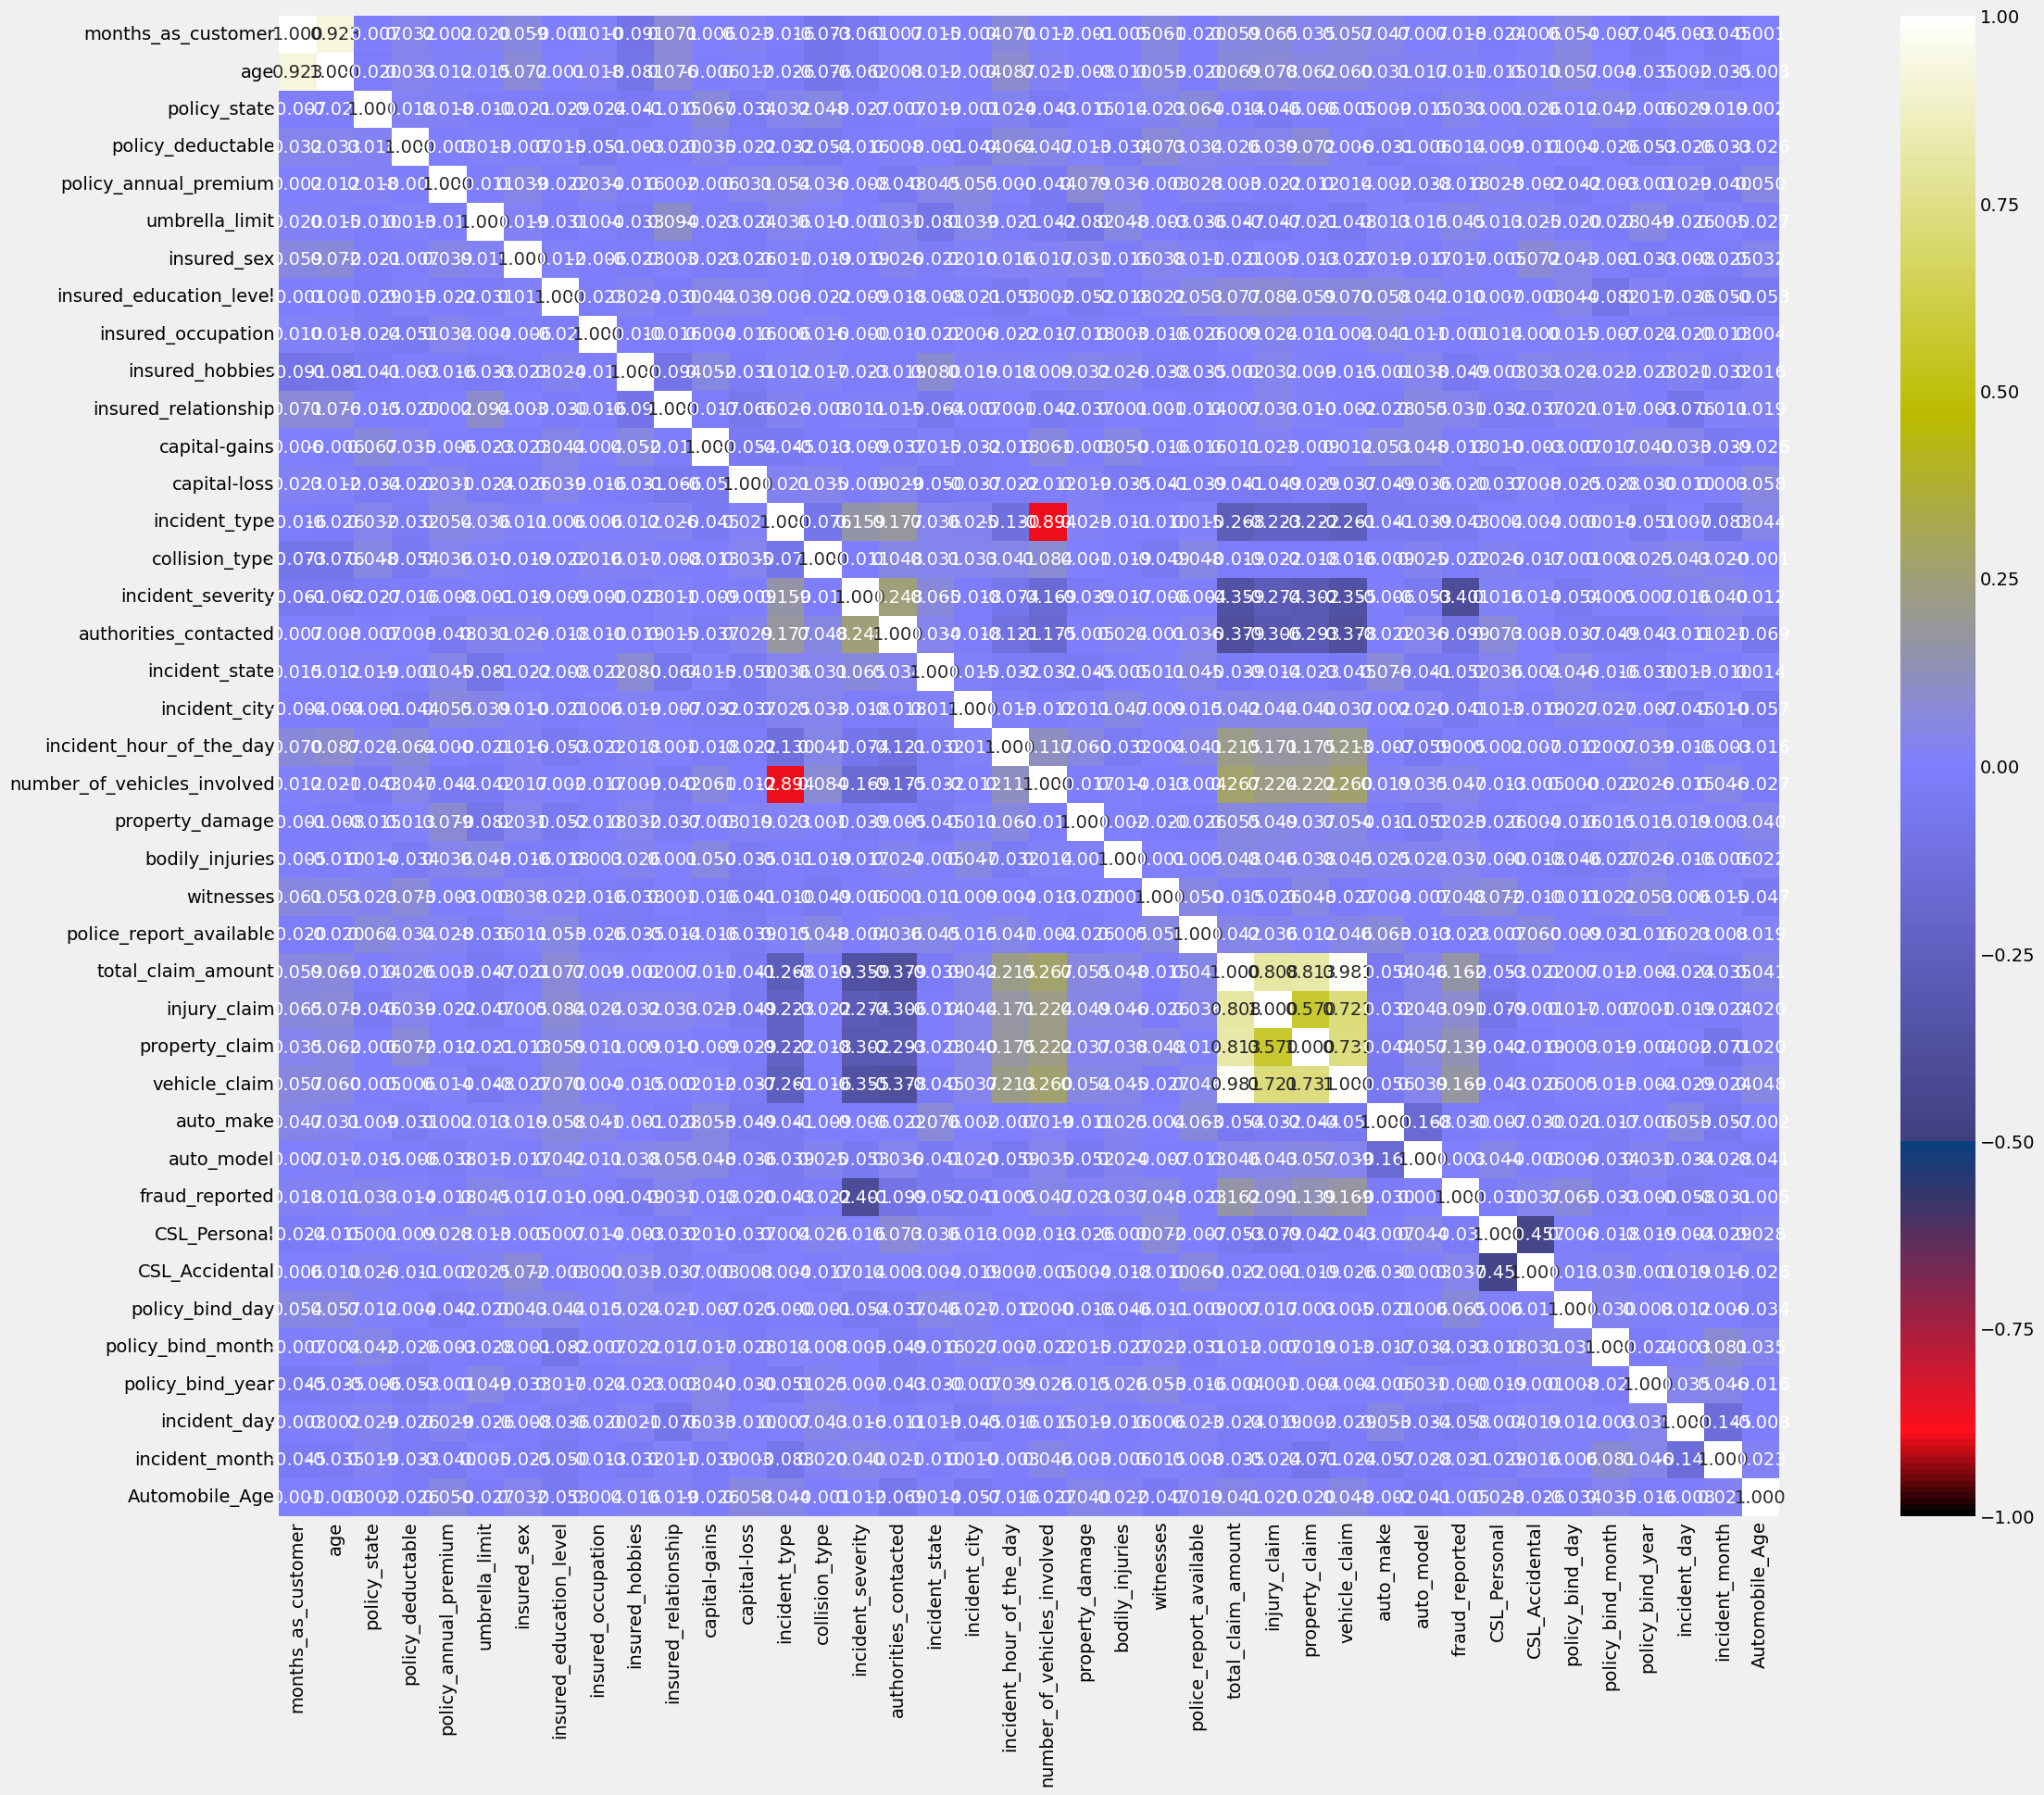

In [65]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', cmap="gist_stern")
plt.show()

## Balanceing Imbalanced target feature

In [66]:
df.fraud_reported.value_counts()

fraud_reported
0    742
1    240
Name: count, dtype: int64

As Target variable data is Imbalanced in nature we will need to balance target variable.

### Balancing using SMOTE

In [67]:
# Splitting data in target and dependent feature
X = df.drop(['fraud_reported'], axis =1)
Y = df['fraud_reported']

In [68]:
# Oversampleing using SMOTE Techniques
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [69]:
Y.value_counts()

fraud_reported
1    742
0    742
Name: count, dtype: int64

# Standard Scaling

In [70]:
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

## Checking Multicollinearity between features using variance_inflation_factor

In [71]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X_scale,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

VIF values                     Features
0       7.415031           months_as_customer
1       7.373828                          age
2       1.061770                 policy_state
3       1.057702            policy_deductable
4       1.060553        policy_annual_premium
5       1.054030               umbrella_limit
6       1.069771                  insured_sex
7       1.049426      insured_education_level
8       1.032861           insured_occupation
9       1.082791              insured_hobbies
10      1.071073         insured_relationship
11      1.069383                capital-gains
12      1.080479                 capital-loss
13      3.791130                incident_type
14      1.098295               collision_type
15      1.409909            incident_severity
16      1.333545        authorities_contacted
17      1.078124               incident_state
18      1.059745                incident_city
19      1.111049     incident_hour_of_the_day
20      3.601980  number_of_vehicles_involved
21      1.075521              property_damage
22      1.052418              bodily_injuries
23      1.076703                    witnesses
24      1.092752      police_report_available
25  46161.897029           total_claim_amount
26   1810.862263                 injury_claim
27   1841.064743               property_claim
28  23120.184788                vehicle_claim
29      1.069720                    auto_make
30      1.079491                   auto_model
31      1.240607                 CSL_Personal
32      1.197083               CSL_Accidental
33      1.029380              policy_bind_day
34      1.047726            policy_bind_month
35      1.038799             policy_bind_year
36      1.056811                 incident_day
37      1.111996               incident_month
38      1.053039               Automobile_Age

# PCA

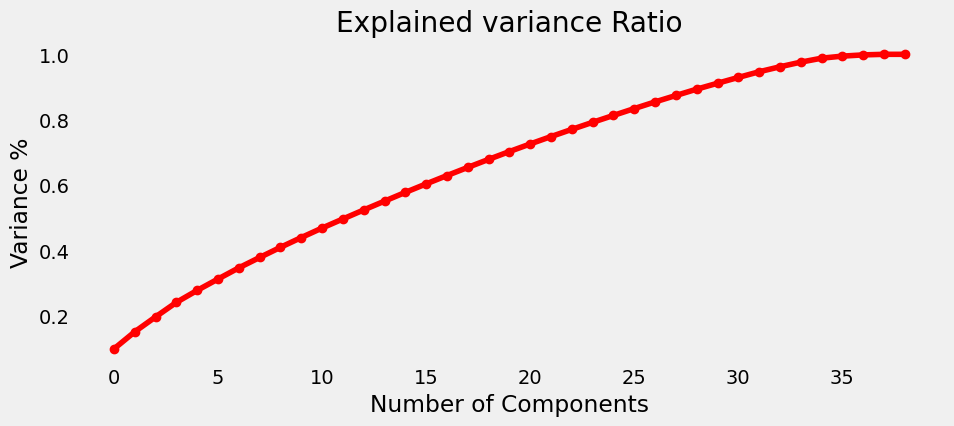

In [72]:
#plot the graph to find the principal components
pca = PCA()
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

AS per the graph, we can see that 28 principal components attribute for 90% of variation in the data. We shall pick the first 28 components for our prediction.

In [73]:
pca_new = PCA(n_components=28)
x_new = pca_new.fit_transform(X_scale)

In [74]:
principle_x=pd.DataFrame(x_new,columns=np.arange(28))

# Machine Learning Model Building

In [75]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (1038, 28)
Training target vector size: (1038,)
Test feature matrix size: (446, 28)
Test target vector size: (446,)


## Logistic Regression

In [76]:
log_reg = LogisticRegression(random_state=42)

In [77]:
log_reg.fit(X_train, Y_train)

LogisticRegression(random_state=42)

In [78]:
Y_pred_log_reg = log_reg.predict(X_test)

### KNN Classifier

In [79]:
knn = KNeighborsClassifier()

In [80]:
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [81]:
Y_pred_knn = knn.predict(X_test)

### Decision Tree Classifier

In [82]:
dec_tree = DecisionTreeClassifier(random_state=42)

In [83]:
dec_tree.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [84]:
Y_pred_dec_tree = dec_tree.predict(X_test)

### Naive Bayes Classifier

In [85]:
nb = GaussianNB()

In [86]:
nb.fit(X_train, Y_train)

GaussianNB()

In [87]:
Y_pred_nb = nb.predict(X_test)

### Support Vector Classifier

In [88]:
svc = SVC(random_state=42)

In [89]:
svc.fit(X_train, Y_train)

SVC(random_state=42)

In [90]:
Y_pred_svc = svc.predict(X_test)

### XGB Classifier

In [91]:
xgb = XGBClassifier()

In [92]:
xgb.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [93]:
Y_pred_xgb = xgb.predict(X_test)

### Random Forest Classifier

In [94]:
ran_for = RandomForestClassifier(random_state=42)

In [95]:
ran_for.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [96]:
Y_pred_ran_for = ran_for.predict(X_test)

# Model Evaluation

In [97]:
print('Logistic Regression:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_log_reg) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_log_reg) * 100, 2))

Logistic Regression:
Accuracy score: 79.37
F1 score: 79.19


In [98]:
print('KNN Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_knn) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_knn) * 100, 2))

KNN Classifier:
Accuracy score: 72.42
F1 score: 76.92


In [99]:
print('Decision Tree Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_dec_tree) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_dec_tree) * 100, 2))

Decision Tree Classifier:
Accuracy score: 73.99
F1 score: 74.34


In [100]:
print('Naive Bayes Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_nb) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_nb) * 100, 2))

Naive Bayes Classifier:
Accuracy score: 80.27
F1 score: 79.25


In [101]:
print('Support Vector Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_svc) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_svc) * 100, 2))

Support Vector Classifier:
Accuracy score: 82.96
F1 score: 81.99


In [102]:
print('XGB Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_xgb) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_xgb) * 100, 2))

XGB Classifier:
Accuracy score: 80.94
F1 score: 80.73


In [103]:
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_ran_for) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_ran_for) * 100, 2))

Random Forest Classifier:
Accuracy score: 83.18
F1 score: 82.35


# Hyperparameter Tuning

In [104]:
n_estimators = [int(x) for x in np.linspace(start=40, stop=150, num=15)]
max_depth = [int(x) for x in np.linspace(40, 150, num=15)]

In [105]:
param_dist = {'n_estimators': n_estimators, 'max_depth': max_depth,}

In [106]:
rf_tuned = RandomForestClassifier(random_state=42)

In [107]:
rf_cv = RandomizedSearchCV(estimator=rf_tuned, param_distributions=param_dist, cv=5, random_state=42)

In [108]:
rf_cv.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [40, 47, 55, 63, 71, 79,
                                                      87, 95, 102, 110, 118,
                                                      126, 134, 142, 150],
                                        'n_estimators': [40, 47, 55, 63, 71, 79,
                                                         87, 95, 102, 110, 118,
                                                         126, 134, 142, 150]},
                   random_state=42)

In [109]:
rf_cv.best_score_

0.8198114083983649

In [110]:
rf_cv.best_params_

{'n_estimators': 110, 'max_depth': 40}

In [111]:
rf_best = RandomForestClassifier(max_depth=102, n_estimators=40, random_state=42)

In [112]:
rf_best.fit(X_train, Y_train)

RandomForestClassifier(max_depth=102, n_estimators=40, random_state=42)

In [113]:
Y_pred_rf_best = rf_best.predict(X_test)

# Final Model

In [114]:
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_rf_best) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_rf_best) * 100, 2))

Random Forest Classifier:
Accuracy score: 81.61
F1 score: 80.38


In [115]:
cm = confusion_matrix(Y_test, Y_pred_rf_best)

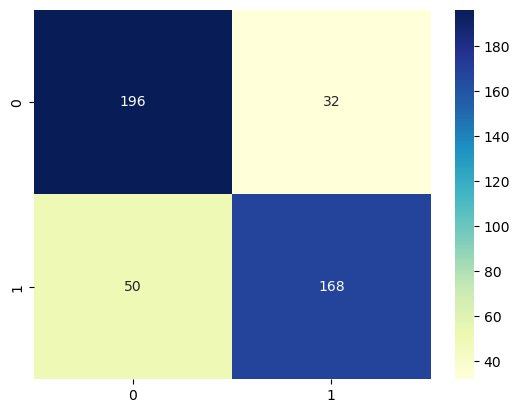

In [116]:
plt.style.use('default')
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.savefig('heatmap.png')
plt.show()

In [117]:
print(classification_report(Y_test, Y_pred_rf_best))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       228
           1       0.84      0.77      0.80       218

    accuracy                           0.82       446
   macro avg       0.82      0.82      0.82       446
weighted avg       0.82      0.82      0.82       446



In this project, we build various models like logistic regression, knn classifier, support vector classifier, decision tree classifier, random forest classifier and xgboost classifier.

A hyperparameter tuned random forest classifier gives the highest accuracy score of 81.61 and f1 score of 80.38.